In [1]:


import matplotlib.pyplot as plt

from PIL import Image

from ssd import SSD

In [2]:
ssd = SSD()


Instructions for updating:
Colocations handled automatically by placer.
logs/ep015-loss3.049-val_loss2.715.h5 model, anchors, and classes loaded.


b'motorbike 0.92' 68 62 316 434
b'person 0.99' 23 151 267 328


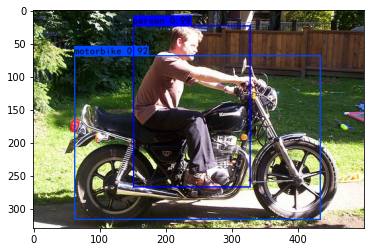

In [16]:
# image = Image.open('E:\\MobileNet\\ssd_keras\\img\\test.jpg')
image = Image.open('F:\\VOC2012\\JPEGImages\\2012_004312.jpg')

r_image = ssd.detect_image(image)

plt.imshow(r_image)

